In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder as LE 

In [70]:
# checking format of data
flight_data = pd.read_csv('M1_final.csv')
flight_data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


array([[<Axes: title={'center': 'MONTH'}>,
        <Axes: title={'center': 'DAY_OF_MONTH'}>,
        <Axes: title={'center': 'DAY_OF_WEEK'}>,
        <Axes: title={'center': 'DEP_DELAY'}>],
       [<Axes: title={'center': 'CRS_ELAPSED_TIME'}>,
        <Axes: title={'center': 'DISTANCE'}>,
        <Axes: title={'center': 'CRS_DEP_M'}>,
        <Axes: title={'center': 'DEP_TIME_M'}>],
       [<Axes: title={'center': 'CRS_ARR_M'}>,
        <Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Humidity'}>,
        <Axes: title={'center': 'Wind Speed'}>],
       [<Axes: title={'center': 'Wind Gust'}>,
        <Axes: title={'center': 'Pressure'}>,
        <Axes: title={'center': 'sch_dep'}>,
        <Axes: title={'center': 'sch_arr'}>],
       [<Axes: title={'center': 'TAXI_OUT'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

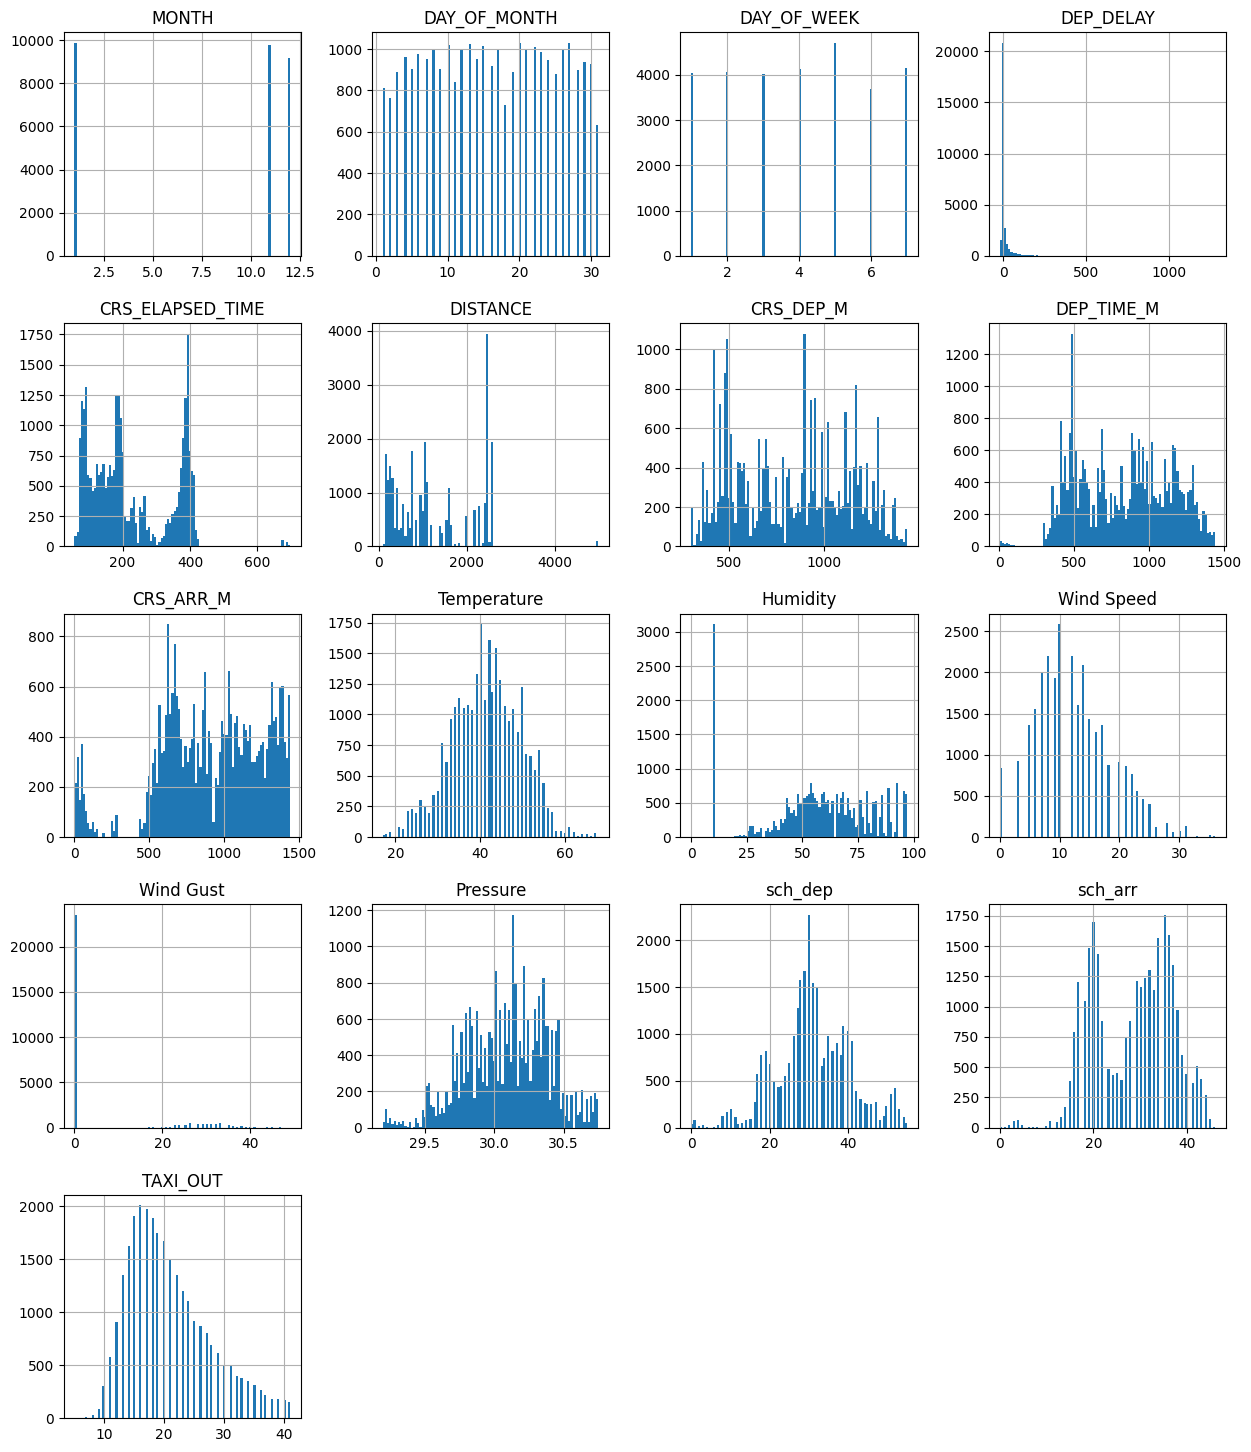

In [71]:
# visual inspection for potential linear relationships
flight_data.hist(figsize=(15,18), bins=100)

In [72]:
# data pre-processing (checking null values)
flight_data.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [73]:
# Calculate the mode of the wind variable, could use another average
mode = flight_data['Wind'].mode().values[0]

# Replace missing values in wind variable with mode
flight_data['Wind'].fillna(mode, inplace=True)

C:\Users\Chris\AppData\Local\Temp\ipykernel_19588\762870123.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  flight_data['Wind'].fillna(mode, inplace=True)


In [74]:
# check null values have been replaced
flight_data.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 0
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [75]:
# process the data so a heat map can be produced - fixed the error string can't change to float.
flight_data=flight_data.drop("TAIL_NUM",axis=1).copy()
flight_data.sch_dep=LE().fit_transform(flight_data.sch_dep)
flight_data.Condition =LE().fit_transform(flight_data.Condition)
flight_data.Wind =LE().fit_transform(flight_data.Wind.astype(str))
flight_data.DEST=LE().fit_transform(flight_data.DEST)
flight_data.OP_UNIQUE_CARRIER=LE().fit_transform(flight_data.OP_UNIQUE_CARRIER)

<Axes: >

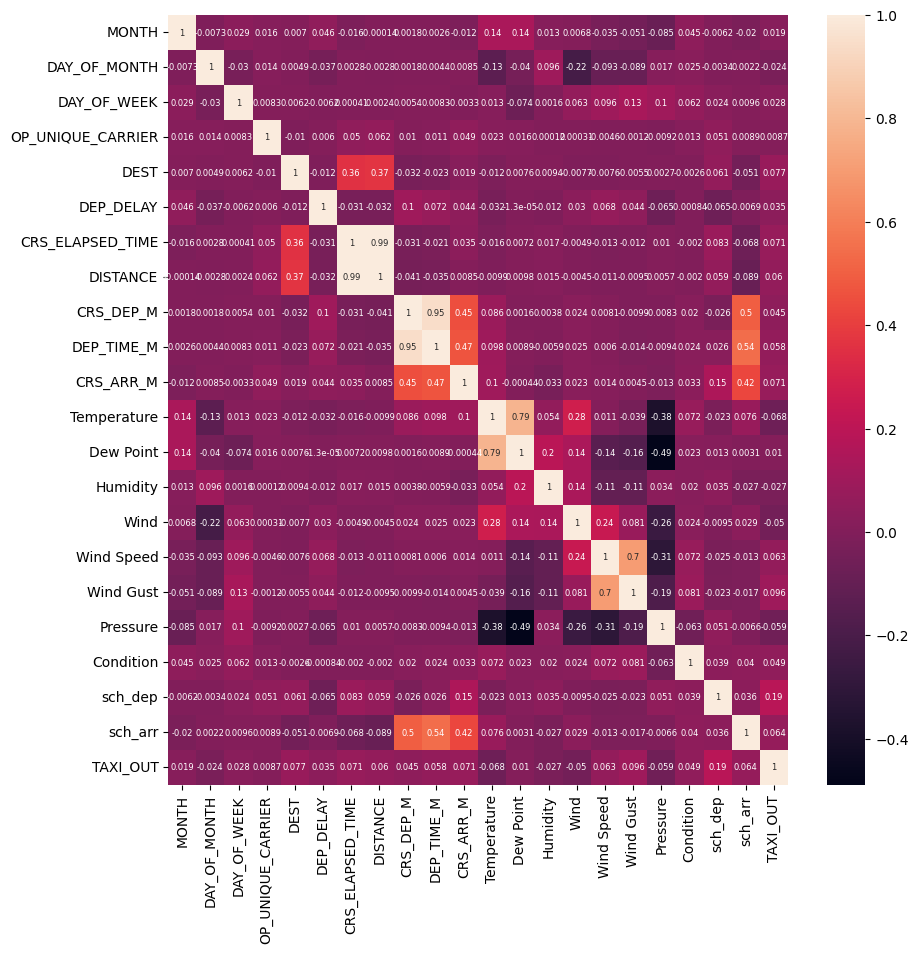

In [76]:
# visualise data in heatmap to see correlations
plt.figure(figsize=(10,10))
sns.heatmap(flight_data.corr(), annot=True, annot_kws={'size': 6})

In [77]:
# visulaising Dew point data
#flight_data.info()
dew_point_counts = flight_data["Dew Point"].value_counts(dropna=False)
print(dew_point_counts)
dew_point_counts_df = pd.DataFrame({"Dew Point": dew_point_counts.index, "Count": dew_point_counts.values})
dew_point_counts_df = dew_point_counts_df.sort_values(by="Dew Point")
print("Counts of values in 'Dew Point' column:")
print(dew_point_counts_df)

Dew Point
33    1349
34    1156
30    1132
35    1124
32    1116
      ... 
56      29
2       28
59      22
57      13
67       3
Name: count, Length: 64, dtype: int64
Counts of values in 'Dew Point' column:
   Dew Point  Count
56        -1     65
54        -2     81
52        -3    128
55        0      75
48        10    147
..       ...    ...
63        67      3
51        6     130
44        7     235
32        8     371
36        9     305

[64 rows x 2 columns]


In [78]:
# change dew point "object" datatype to int
flight_data["Dew Point"] = flight_data["Dew Point"].astype("int64")

Text(0.5, 1.0, 'Dew Point against Pressure')

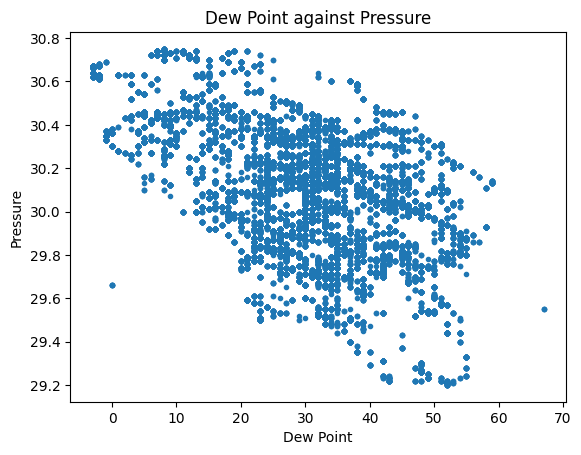

In [79]:
ax = flight_data.plot(kind = "scatter", x = "Dew Point", y = "Pressure", s = 9)
ax.tick_params(axis='both', which='major', labelsize=10)
plt.title("Dew Point against Pressure")


In [80]:
# test train split
X_train, X_test, y_train, y_test = train_test_split(flight_data["Dew Point"], flight_data["Pressure"], test_size = 0.2, random_state = 0)

In [81]:
# create linear model 
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)

LinearRegression()

In [82]:
# use model to predict on TEST data
prediction = LR.predict(X_test.values.reshape(-1,1))

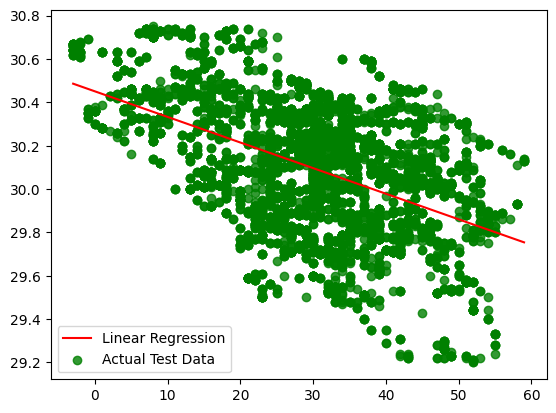

In [83]:
# Sort X_test and y_test based on X_test
sorted_indices = np.argsort(X_test)
X_test_sorted = X_test.iloc[sorted_indices]
y_test_sorted = y_test.iloc[sorted_indices]

# Plot the prediction line against the sorted actual test data
plt.plot(X_test_sorted, prediction[sorted_indices], label="Linear Regression", color="r")
plt.scatter(X_test, y_test, label="Actual Test Data", color="g", alpha=0.8)
plt.legend()
plt.show()

<Axes: ylabel='Pressure'>

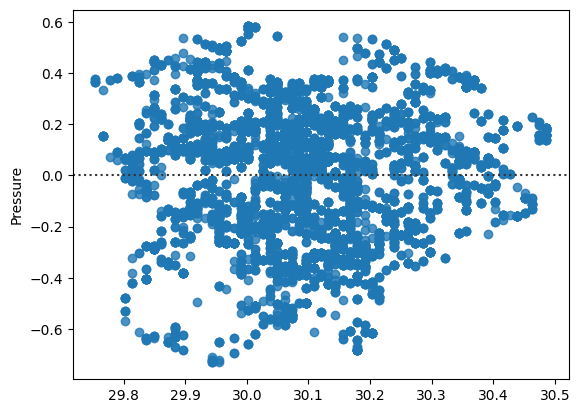

In [84]:
# look at residuals to assess suitablity of the model
sns.residplot(x = prediction, y = y_test)

In [85]:
# compare predicted values against actual values
pred = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': prediction})
pred

,Actual Value,Predicted Value
3668,29.87,30.084750
27409,29.71,30.131967
24387,29.77,30.013925
1872,30.37,30.037533
6666,30.21,30.061142
...,...,...
20858,30.10,30.131967
1724,30.34,30.120163
183,30.14,30.084750
16132,30.22,30.072946


In [86]:
# measuring the accuracy of the linear regression model
LR.score(X_test.values.reshape(-1,1), y_test.values)

0.2338045633711049

In [87]:
# attempting to predict taxi out using multivariable linear regression
X = flight_data.drop("TAXI_OUT",axis=1)
y = flight_data["TAXI_OUT"]

In [88]:
# train, test and split my data, 80% for training
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)

# create instance
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train) # create model

LinearRegression()

In [89]:
# prediction based on model
y_pred = linear_regressor.predict(X_test)

In [90]:
# data frame to show predictions
pd.DataFrame({"Actual":y_test, "Prediction": y_pred})

,Actual,Prediction
10545,18,21.035269
12638,17,20.727845
4125,18,20.139192
20446,33,23.590331
3476,13,21.178586
...,...,...
25736,24,18.085987
17442,22,21.371805
25704,20,19.129542
27937,16,16.324249


In [92]:
# evaluting model
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
linear_regressor.score(X_test.values, y_test.values)

MAE: 5.225357453599869


c:\Users\Chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.09490491411956159